# Use pre-trained Model and get hidden representation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SmilesTools import smiUtil as SU
from AE4SmilesLib import CNAE, tbHistoryPlot

Using TensorFlow backend.


In [18]:
from rdkit import Chem
from rdkit.Chem import Descriptors

In [2]:
sm = SU()

Keep parameters in dictionary  
**lrep** : hidden rep size  
**nEL** : number of conv + maxpool block  
**reg** : activity L1 regulation factor  
**flt** : number of conv filters per layer  
**opt** : optimizer to use  
**ngpu** : number of gpus to use   
**batch** : minibatch size  
**EPO** : number of epochs  

In [3]:
bp = {
    'lrep' : 145,
    'nEL' : 1,
    'reg' : 1.0e-9,
    'flt' : 32,
    'kern' : 5,
    'opt' : 'adam',
    'ngpu' : 1,
    'batch' : 256,
    'EPO' : 30
    }

bcn = CNAE(sm,**bp)

Network weights need to be created from net of same structure; **_lrep, nEL, flt & kern_** need to be same.

In [4]:
bcn.loadw('data/test5MCNNv3Co1.hdf5')

In [6]:
dat = pd.read_pickle('data/6MSmiles.pkl')

In [7]:
k = 2000
zinctst = dat[-k:]
zinctst = zinctst.reset_index(drop=True)
del dat
zinctst.head()

,Molecule
0,O=C(Cn1nc(ccc1=O)-c1cccc2ccccc12)NC1CCCCCC1
1,COc1cc(cc(OC)c1OC)C(=O)NCCn1c(C)nc2ncccc2c1=O
2,Fc1cc(F)c(CC(=O)NCCCc2nnc3ccccn23)cc1F
3,Cc1nc2ccc(F)cc2c(=O)n1CC(=O)Nc1nc(cs1)-c1cccnc1
4,Clc1cccc(c1)N1CCN(CC1)C(=O)CCC(=O)NCc1cccnc1


In [33]:
zinctst.to_csv('data/zinc2k.csv',sep='\t')

In [8]:
zoh = sm.smi2OH(zinctst)

In [9]:
zhr = bcn.enc.predict(zoh)

In [13]:
nr,nc = zhr.shape; nc

145

In [15]:
cn = ['H'+str(i) for i in range(nc)]

In [16]:
dfh = pd.DataFrame(zhr,columns=cn); dfh.head()

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H135,H136,H137,H138,H139,H140,H141,H142,H143,H144
0,0.0,0.138278,0.0,0.0,0.0,0.0,0.434843,0.241043,0.441055,0.220548,...,0.0,0.257550,0.315712,0.323221,0.0,0.0,0.115734,0.0,0.0,0.068787
1,0.0,0.253212,0.0,0.0,0.0,0.0,0.395434,0.400080,0.486710,0.258511,...,0.0,0.539110,0.464141,0.478079,0.0,0.0,0.173861,0.0,0.0,0.344050
2,0.0,0.313108,0.0,0.0,0.0,0.0,0.321700,0.086854,0.298712,0.449987,...,0.0,0.502496,0.559745,0.313722,0.0,0.0,0.047192,0.0,0.0,0.153005
3,0.0,0.254836,0.0,0.0,0.0,0.0,0.527875,0.167977,0.546830,0.324439,...,0.0,0.197437,0.465605,0.323332,0.0,0.0,0.186471,0.0,0.0,0.401353
4,0.0,0.024100,0.0,0.0,0.0,0.0,0.364764,0.350431,0.065621,0.133440,...,0.0,0.360050,0.365667,0.179437,0.0,0.0,0.208204,0.0,0.0,0.400351


In [31]:
def slogP(s):
    m = Chem.MolFromSmiles(s)
    lp = Descriptors.MolLogP(m)
    return lp

In [34]:
slp = [slogP(s) for s in zinctst.Molecule]

In [35]:
dfh['SLogP']=slp; dfh.head()

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H136,H137,H138,H139,H140,H141,H142,H143,H144,SLogP
0,0.0,0.138278,0.0,0.0,0.0,0.0,0.434843,0.241043,0.441055,0.220548,...,0.257550,0.315712,0.323221,0.0,0.0,0.115734,0.0,0.0,0.068787,3.90250
1,0.0,0.253212,0.0,0.0,0.0,0.0,0.395434,0.400080,0.486710,0.258511,...,0.539110,0.464141,0.478079,0.0,0.0,0.173861,0.0,0.0,0.344050,1.55572
2,0.0,0.313108,0.0,0.0,0.0,0.0,0.321700,0.086854,0.298712,0.449987,...,0.502496,0.559745,0.313722,0.0,0.0,0.047192,0.0,0.0,0.153005,2.43810
3,0.0,0.254836,0.0,0.0,0.0,0.0,0.527875,0.167977,0.546830,0.324439,...,0.197437,0.465605,0.323332,0.0,0.0,0.186471,0.0,0.0,0.401353,3.00122
4,0.0,0.024100,0.0,0.0,0.0,0.0,0.364764,0.350431,0.065621,0.133440,...,0.360050,0.365667,0.179437,0.0,0.0,0.208204,0.0,0.0,0.400351,2.48020


## Remove columns with zero varience 

In [45]:
cvar = np.var(dfh,axis=0)

In [51]:
idx=np.where(cvar==0.0)
idx=list(dfh.columns[idx])

In [53]:
dfh.drop(columns=idx,inplace=True)

In [56]:
dfh.head()

,H1,H6,H7,H8,H9,H12,H13,H15,H16,H18,...,H129,H130,H133,H134,H136,H137,H138,H141,H144,SLogP
0,0.138278,0.434843,0.241043,0.441055,0.220548,0.379578,0.467840,0.452926,0.247281,0.097637,...,0.078564,0.196710,0.694616,0.165383,0.257550,0.315712,0.323221,0.115734,0.068787,3.90250
1,0.253212,0.395434,0.400080,0.486710,0.258511,0.496069,0.600348,0.412901,0.148275,0.127388,...,0.056921,0.168106,0.381495,0.143531,0.539110,0.464141,0.478079,0.173861,0.344050,1.55572
2,0.313108,0.321700,0.086854,0.298712,0.449987,0.274173,0.675068,0.357308,0.675997,0.217526,...,0.174444,0.180870,0.132825,0.101998,0.502496,0.559745,0.313722,0.047192,0.153005,2.43810
3,0.254836,0.527875,0.167977,0.546830,0.324439,0.232839,0.562884,0.182728,0.164799,0.315960,...,0.305031,0.230581,0.530763,0.234143,0.197437,0.465605,0.323332,0.186471,0.401353,3.00122
4,0.024100,0.364764,0.350431,0.065621,0.133440,0.076240,0.507223,0.364280,0.058163,0.212882,...,0.288961,0.183845,0.508866,0.129886,0.360050,0.365667,0.179437,0.208204,0.400351,2.48020


In [58]:
X = dfh.iloc[:,0:91]

In [60]:
X.head()

,H1,H6,H7,H8,H9,H12,H13,H15,H16,H18,...,H127,H129,H130,H133,H134,H136,H137,H138,H141,H144
0,0.138278,0.434843,0.241043,0.441055,0.220548,0.379578,0.467840,0.452926,0.247281,0.097637,...,0.433196,0.078564,0.196710,0.694616,0.165383,0.257550,0.315712,0.323221,0.115734,0.068787
1,0.253212,0.395434,0.400080,0.486710,0.258511,0.496069,0.600348,0.412901,0.148275,0.127388,...,0.129494,0.056921,0.168106,0.381495,0.143531,0.539110,0.464141,0.478079,0.173861,0.344050
2,0.313108,0.321700,0.086854,0.298712,0.449987,0.274173,0.675068,0.357308,0.675997,0.217526,...,0.159549,0.174444,0.180870,0.132825,0.101998,0.502496,0.559745,0.313722,0.047192,0.153005
3,0.254836,0.527875,0.167977,0.546830,0.324439,0.232839,0.562884,0.182728,0.164799,0.315960,...,0.088089,0.305031,0.230581,0.530763,0.234143,0.197437,0.465605,0.323332,0.186471,0.401353
4,0.024100,0.364764,0.350431,0.065621,0.133440,0.076240,0.507223,0.364280,0.058163,0.212882,...,0.554271,0.288961,0.183845,0.508866,0.129886,0.360050,0.365667,0.179437,0.208204,0.400351


In [61]:
y = dfh.iloc[:,91]; y.head()

0    3.90250
1    1.55572
2    2.43810
3    3.00122
4    2.48020
Name: SLogP, dtype: float64

### RF a bit slow, do 100 trees

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
regr = RandomForestRegressor(n_estimators=100,oob_score=True)

In [67]:
regr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [68]:
yob = regr.oob_prediction_

In [70]:
import seaborn as sbn

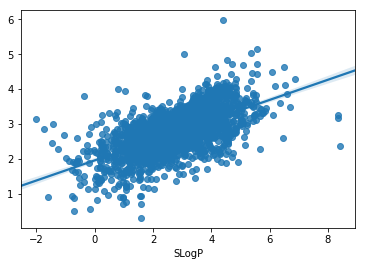

In [71]:
sbn.regplot(y,yob)

In [74]:
from rdkit.Chem.rdmolops import PatternFingerprint

In [104]:
def fngrPrint(s):
    m = Chem.MolFromSmiles(s)
    f = PatternFingerprint(m)
    f = f.ToBitString()
    f = np.array([int(x) for x in f])
    f = f.reshape(1,-1)
    return f

In [119]:
fps = np.concatenate([fngrPrint(s) for s in zinctst.Molecule],axis=0)

In [117]:
cn = ['F'+str(i) for i in range(2048)]

In [120]:
fps = pd.DataFrame(fps,columns=cn); fps.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F2038,F2039,F2040,F2041,F2042,F2043,F2044,F2045,F2046,F2047
0,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [121]:
cvar = np.var(fps,axis=0)

In [122]:
idx=np.where(cvar==0.0)
idx=list(fps.columns[idx])

In [124]:
fps.drop(columns=idx,inplace=True)
fps.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F2038,F2039,F2040,F2041,F2042,F2043,F2044,F2045,F2046,F2047
0,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [125]:
X = fps

In [126]:
regr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [127]:
yob = regr.oob_prediction_

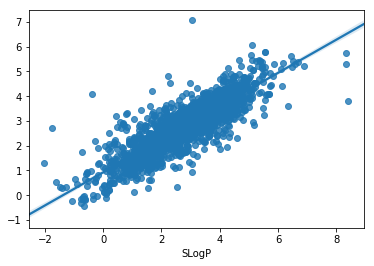

In [128]:
sbn.regplot(y,yob)